In [373]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy, math
from sklearn.metrics import accuracy_score

In [374]:
df = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [375]:
df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [376]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [377]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [378]:
df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [379]:
df = df.drop('size_units', axis = 1)
df_test = df_test.drop('size_units', axis = 1)

In [380]:
df = df.dropna()
df_test = df_test.dropna()
df.shape

(1669, 7)

In [381]:
print(df.isnull().sum())
print(df_test.isnull().sum())

beds              0
baths             0
size              0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64
beds              0
baths             0
size              0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64


In [382]:
m, n = df.shape
for i in range (n):
  if df.iat[i,4] == "acre":
    df.iat[i, 3] = df.iloc[i, 3] * 43560
    df_test.iat[i, 3] = df_test.iloc[i, 3] * 43560

In [383]:
df = df.drop('lot_size_units', axis = 1)
df = df.drop('zip_code', axis = 1)

df_test = df_test.drop('lot_size_units', axis = 1)
df_test = df_test.drop('zip_code', axis = 1)

df.head(3)

,beds,baths,size,lot_size,price
0,3,2.5,2590.0,6000.0,795000.0
1,4,2.0,2240.0,13503.6,915000.0
2,4,3.0,2040.0,3783.0,950000.0


In [384]:
max_nums = [df['beds'].max(), df['baths'].max(), df['size'].max(), df['lot_size'].max(), df['price'].max()]
max_nums_t = [df_test['beds'].max(), df_test['baths'].max(), df_test['size'].max(), df_test['lot_size'].max(), df_test['price'].max()]

m, n = df.shape
o, p = df_test.shape

for i in range (m):
  for j in range (n):
    '''
    if j == n - 1:
      df.iat[i, j] = df.iloc[i, j] / 1000.0
    '''
    df.iat[i, j] = df.iloc[i, j] / max_nums[j]

for i in range (o):
  for j in range (p):
    df_test.iat[i, j] = df_test.iloc[i, j] / max_nums_t[j]

df.head(3)

,beds,baths,size,lot_size,price
0,0.200000,0.277778,0.235241,0.137741,0.0318
1,0.266667,0.222222,0.203451,0.310000,0.0366
2,0.266667,0.333333,0.185286,0.086846,0.0380


<AxesSubplot:>

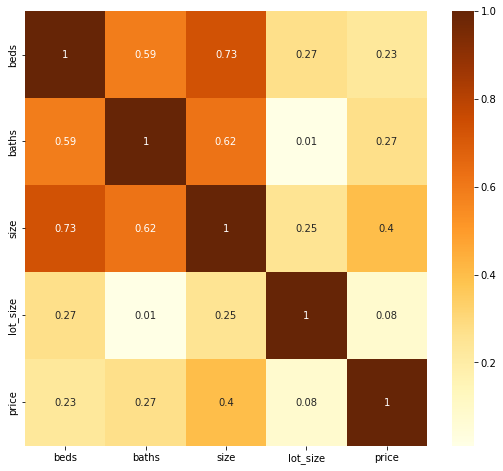

In [385]:
correl = df.corr().round(2)
plt.figure(figsize = (9,8))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

In [386]:
x_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]

x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [387]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [388]:
x_train.shape, y_train.shape

((1669, 4), (1669,))

In [389]:
def compute_gradient(x, y, w, b):
  m, n = x.shape
  dj_w = np.zeros((n,))
  dj_b = 0
  
  #m = rows, n = columns
  for i in range (m):
    err = (np.dot(w, x[i]) + b) - y[i]
    for j in range (n):
      dj_w[j] = dj_w[j] + err * x[i, j]
    dj_b = dj_b + err
  
  dj_w = dj_w / m
  dj_b = dj_b / m
  return dj_w, dj_b

In [390]:
#testing if compute_gradient is working or not..
m, n = x_train.shape
w_in = np.zeros((n,))
b_in = 0

compute_gradient(x_train, y_train, w_in, b_in)

(array([-0.00939211, -0.01181614, -0.00849248, -0.00394686]),
 -0.041539008460155666)

In [391]:
def compute_cost (x, y, w, b):
  m = x.shape[0]
  cost = 0.0
  for i in range (m):
    f_wb_i = np.dot(w, x[i]) + b
    cost = cost + (f_wb_i - y[i]) ** 2
  cost = cost / (2 * m)
  return cost

In [392]:
def gradient_descent(x, y, w_in, b_in, compute_gradient, compute_cost, alpha, num_iters):
  w = copy.deepcopy(w_in)
  b = b_in

  J_history = []
  iter_rec = []
  for i in range (num_iters):
    dj_w, dj_b = compute_gradient(x, y, w, b)
    
    #recording the cost history
    if i % 3 == 0:
      J_history.append(compute_cost(x, y, w, b))
      iter_rec.append(i)

    w = w - alpha * dj_w
    b = b - alpha * dj_b
  
  return w, b, J_history, iter_rec

In [411]:
alpha = 0.01
iterations = 1000
final_w, final_b, J_history, iter_rec = gradient_descent(x_train, y_train, w_in, b_in, compute_gradient, compute_cost, alpha, iterations)
print(final_w, final_b)

[0.01219437 0.0175707  0.01692149 0.00460449] 0.031654461355786694


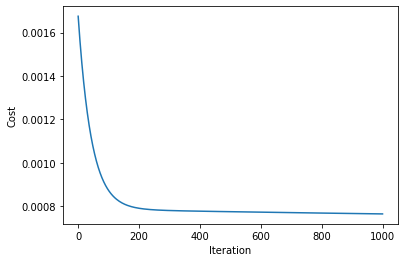

In [412]:
plt.plot(iter_rec, J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [413]:
train_cost = compute_cost(x_train, y_train, final_w, final_b)
test_cost = compute_cost(x_test, y_test, final_w, final_b)

print(f"total cost on training data : {train_cost}") 
print(f"total cost on test data : {test_cost}")

total cost on training data : 0.0007653451251227924
total cost on test data : 0.011712820699294827
